<a href="https://colab.research.google.com/github/NakanoDataLab/data_analysis_100knocks/blob/main/Chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3章 顧客の全体像を把握する10本ノック (21~30)

In [1]:
# 下準備としてgoogleのドライブをマウントして作業ディレクトリを移動
from google.colab import drive
import os
import pandas as pd

# Google Drive をマウント
drive.mount('/content/drive')

# 作業ディレクトリの設定
DATA_ROOT_DIR = "/content/drive/MyDrive/data_analysis_knock/"
os.chdir(DATA_ROOT_DIR)


Mounted at /content/drive


In [2]:
import pandas as pd

# データを読み込む
use_log = pd.read_csv('use_log.csv')
customer = pd.read_csv('customer_master.csv')
class_master = pd.read_csv('class_master.csv')
campaign_master = pd.read_csv('campaign_master.csv')

#件数の確認
print('use_log:',len(use_log))
print('customer:',len(customer))
print('class_master:',len(class_master))
print('campaign_master:',len(campaign_master))


use_log: 197428
customer: 4192
class_master: 3
campaign_master: 3


In [3]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,PL003414,2018-12-14
1,L00000049012331,PL003414,2018-10-06
2,L00000049012332,PL003414,2019-04-15
3,L00000049012333,PL003414,2018-06-03
4,L00000049012334,PL003414,2018-07-25


In [4]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,AS000000,山田 太郎0,C01,M,2016-05-11 00:00:00,2020-01-09 00:00:00,CA3,1
1,AS000001,山田 太郎1,C03,F,2017-04-17 00:00:00,2018-12-30 00:00:00,CA1,1
2,PL000002,山田 太郎2,C02,F,2019-03-25 00:00:00,2020-06-12 00:00:00,CA1,1
3,IK000003,山田 太郎3,C02,M,2016-08-29 00:00:00,NaN,CA1,0
4,IK000004,山田 太郎4,C01,M,2017-09-15 00:00:00,NaN,CA2,0


In [5]:
class_master.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [6]:
campaign_master.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


        ***ノック22*** 顧客データを成型しよう!

In [7]:
#データを結合する!
customer_join = pd.merge(left=customer, right=class_master, how="left", on="class")
customer_join = pd.merge(left=customer_join, right=campaign_master, how="left", on="campaign_id")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,AS000000,山田 太郎0,C01,M,2016-05-11 00:00:00,2020-01-09 00:00:00,CA3,1,オールタイム,10500,入会費無料
1,AS000001,山田 太郎1,C03,F,2017-04-17 00:00:00,2018-12-30 00:00:00,CA1,1,ナイト,6000,通常
2,PL000002,山田 太郎2,C02,F,2019-03-25 00:00:00,2020-06-12 00:00:00,CA1,1,デイタイム,7500,通常
3,IK000003,山田 太郎3,C02,M,2016-08-29 00:00:00,NaN,CA1,0,デイタイム,7500,通常
4,IK000004,山田 太郎4,C01,M,2017-09-15 00:00:00,NaN,CA2,0,オールタイム,10500,入会費半額


In [8]:
#欠損値を調べる
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


       ノック23 **顧客データの集計をしよう**

In [9]:
# 会員クラスごとの会員数の集計
customer_join.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,2088
デイタイム,1063
ナイト,1041


In [10]:
#キャンペーンごとの会員数を集計
customer_join.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,614
入会費無料,505
通常,3073


In [11]:
#性別ごとの会員数
customer_join.groupby('gender').count()['customer_id']

,customer_id
gender,
F,1897
M,2295


In [12]:
# 退会している会員と退会していない会員を集計
customer_join.groupby('is_deleted').count()['customer_id']

,customer_id
is_deleted,
0,2842
1,1350


In [13]:

# '2018/4/01'以降に新規登録した顧客の抽出
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1113


ノック24 **最新顧客データの基礎集計をしてみよう**

In [14]:
# end_dateをdatetime型に変換
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])

# 最新の顧客データを抽出
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) |(customer_join['end_date'].isna())]

# 最新の顧客データの件数を確認
print(len(customer_newer))

# 最新の顧客データの退会日一覧を確認
customer_newer['end_date'].unique()

3710


<DatetimeArray>
['2020-01-09 00:00:00', '2020-06-12 00:00:00',                 'NaT',
 '2021-11-04 00:00:00', '2020-07-27 00:00:00', '2020-08-07 00:00:00',
 '2020-01-15 00:00:00', '2022-01-10 00:00:00', '2021-10-02 00:00:00',
 '2019-10-02 00:00:00',
 ...
 '2019-04-28 00:00:00', '2020-05-17 00:00:00', '2020-01-08 00:00:00',
 '2020-07-11 00:00:00', '2019-05-23 00:00:00', '2019-11-09 00:00:00',
 '2021-05-08 00:00:00', '2019-05-10 00:00:00', '2022-02-22 00:00:00',
 '2021-01-23 00:00:00']
Length: 601, dtype: datetime64[ns]

In [15]:
# 会員クラスごとの会員数を集計する
customer_newer.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,1843
デイタイム,934
ナイト,933


In [16]:
# キャンペーンごとの会員数を集計
customer_newer.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,544
入会費無料,441
通常,2725


In [17]:
#性別ごとの会員数を集計
customer_newer.groupby("gender").count()["customer_id"]

,customer_id
gender,
F,1670
M,2040


**ノック25** **利用履歴データを集計しよう**

In [18]:
#日付データをdatetime型に変更
use_log['usedate'] = pd.to_datetime(use_log['usedate'])

# 年月列を作成
use_log['年月'] = use_log['usedate'].dt.strftime('%y%m')

#顧客ごとの月別利用回数を集計
use_log_months = use_log.groupby(['年月', 'customer_id'], as_index = False).count()

#log_idのカウントをcountにリネーム
use_log_months.rename(columns = {'log_id':'count'}, inplace = True)

# usedateの列を削除
del use_log_months['usedate']

# customer_idの型を変える
use_log_months['customer_id'] = use_log_months['customer_id'].astype(str)
use_log_months['count'] = use_log_months['count'].astype(int)
#データの先頭を表示
use_log_months.head()


,年月,customer_id,count
0,1804,AS000000,2
1,1804,AS000001,14
2,1804,AS000006,3
3,1804,AS000008,4
4,1804,AS000011,1


In [19]:
# customer_idごとの統計量を計算する
use_log_customer = use_log_months.groupby("customer_id").agg({
    "count": ["mean", "median", "max", "min"]
}).reset_index()

# カラム名の調整（列名が階層化されるためフラットにする）
use_log_customer.columns = ["customer_id", "mean", "median", "max", "min"]

use_log_customer.head()

,customer_id,mean,median,max,min
0,AS000000,2.923077,3.0,4,2
1,AS000001,12.000000,12.0,16,9
2,AS000006,3.230769,3.0,8,2
3,AS000008,4.230769,4.0,7,2
4,AS000011,3.923077,4.0,6,1


ノック26 利用履歴データから定期利用フラグを作成しよう!

In [20]:

# 曜日の取得
use_log['weekday'] = use_log['usedate'].dt.weekday

# groupby()でデータを集計
use_log_weekday = use_log.groupby(['customer_id', '年月', 'weekday'], as_index =False).count()[["customer_id", "年月", "weekday", "log_id"]]

# log_idをcountにリネーム
use_log_weekday.rename(columns = {'log_id':'count'}, inplace = True)
use_log_weekday.head()

,customer_id,年月,weekday,count
0,AS000000,1804,4,1
1,AS000000,1804,5,1
2,AS000000,1805,0,1
3,AS000000,1805,2,2
4,AS000000,1805,4,1


In [21]:
# 曜日ごとの最大のcountをとる
use_log_weekday = use_log_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]

# 新しい列を作って全ての顧客に0を初期設定する
use_log_weekday['routine_flag'] = 0

#countが4回以上の人だけ　=1 にする
use_log_weekday["routine_flag"].loc[use_log_weekday["count"] >= 4] = 1

#テキストの方法(あまり使われない書き方)
# use_log_weekday["routine_flag"] = use_log_weekday["routine_flag"].where(use_log_weekday["count"] < 4, True)
use_log_weekday.head()



<ipython-input-21-0a3504edef06>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  use_log_weekday["routine_flag"].loc[use_log_weekday["count"] >= 4] = 1
<ipython-input-21-0a3504edef06>:8: SettingWithCopyWarning: 
A value is trying to be set o

,customer_id,count,routine_flag
0,AS000000,2,0
1,AS000001,5,1
2,AS000006,3,0
3,AS000008,3,0
4,AS000011,2,0


ノック27 **顧客データと利用履歴データを結合しよう**

In [22]:
# customer_joinにuse_log_weekdayを結合
customer_join = pd.merge(left=customer_join, right=use_log_customer, on="customer_id", how="left")
customer_join = pd.merge(left = customer_join, right = use_log_weekday[['customer_id', 'routine_flag']], on = 'customer_id', how = 'left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,AS000000,山田 太郎0,C01,M,2016-05-11,2020-01-09,CA3,1,オールタイム,10500,入会費無料,2.923077,3.0,4.0,2.0,0.0
1,AS000001,山田 太郎1,C03,F,2017-04-17,2018-12-30,CA1,1,ナイト,6000,通常,12.000000,12.0,16.0,9.0,1.0
2,PL000002,山田 太郎2,C02,F,2019-03-25,2020-06-12,CA1,1,デイタイム,7500,通常,3.923077,4.0,7.0,1.0,0.0
3,IK000003,山田 太郎3,C02,M,2016-08-29,NaT,CA1,0,デイタイム,7500,通常,NaN,NaN,NaN,NaN,NaN
4,IK000004,山田 太郎4,C01,M,2017-09-15,NaT,CA2,0,オールタイム,10500,入会費半額,3.000000,3.0,7.0,1.0,0.0


In [23]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


ノック28 **会員期間を計算しよう！**

In [24]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
deltas = [relativedelta(calc_date, start_time) for calc_date, start_time in zip(customer_join["calc_date"], customer_join["start_date"])]
member_ship_periods = [delta.years*12 + delta.months for delta in deltas]
customer_join["membership_period"] = member_ship_periods
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,AS000000,山田 太郎0,C01,M,2016-05-11,2020-01-09,CA3,1,オールタイム,10500,入会費無料,2.923077,3.0,4.0,2.0,0.0,2020-01-09,43
1,AS000001,山田 太郎1,C03,F,2017-04-17,2018-12-30,CA1,1,ナイト,6000,通常,12.000000,12.0,16.0,9.0,1.0,2018-12-30,20
2,PL000002,山田 太郎2,C02,F,2019-03-25,2020-06-12,CA1,1,デイタイム,7500,通常,3.923077,4.0,7.0,1.0,0.0,2020-06-12,14
3,IK000003,山田 太郎3,C02,M,2016-08-29,NaT,CA1,0,デイタイム,7500,通常,NaN,NaN,NaN,NaN,NaN,2019-04-30,32
4,IK000004,山田 太郎4,C01,M,2017-09-15,NaT,CA2,0,オールタイム,10500,入会費半額,3.000000,3.0,7.0,1.0,0.0,2019-04-30,19


ノック29 **顧客行動の各種統計量を把握しよう**

In [27]:
#基本的な統計量と、顧客の特性を把握する
customer_join[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,2703.000000,2703.000000,2703.000000,2703.000000
mean,5.669128,5.550499,9.443581,2.519423
std,2.865039,2.920318,3.966418,2.011139
min,2.230769,2.000000,4.000000,1.000000
25%,3.615385,3.500000,7.000000,1.000000
50%,4.230769,4.000000,8.000000,2.000000
75%,7.307692,7.000000,12.000000,3.000000
max,20.615385,21.000000,29.000000,15.000000


In [28]:
#routine_flagがついている人とついていない人を分けて見る
customer_join.groupby('routine_flag').count()['customer_id']

,customer_id
routine_flag,
0.0,1764
1.0,939


(array([294., 305., 388., 385., 486., 516., 378., 515., 430., 495.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <BarContainer object of 10 artists>)

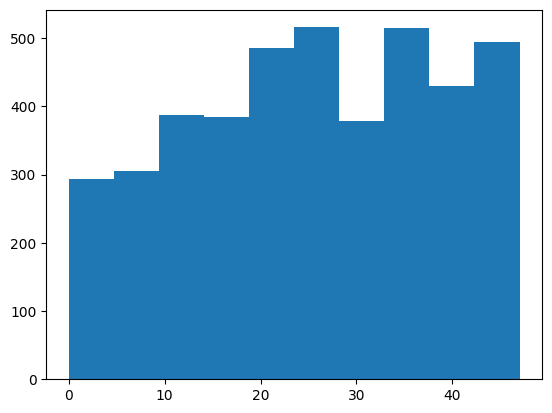

In [29]:
# membershio_periodをグラフ化する
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

ノック30 **退会ユーザーと継続ユーザーの違いを把握しよう**

In [30]:
# 退会ユーザーの基本統計量を確認
customer_end = customer_join.loc[customer_join["is_deleted"] == True]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flag,calc_date,membership_period
count,1350,1350,1350.0,1350.000000,890.000000,890.000000,890.000000,890.000000,890.000000,1350,1350.000000
mean,2017-04-23 19:22:40,2019-10-21 06:49:36,1.0,8596.666667,5.659540,5.547753,9.421348,2.506742,0.358427,2019-10-21 06:49:36,29.434074
min,2015-05-01 00:00:00,2016-07-13 00:00:00,1.0,6000.000000,2.461538,2.000000,4.000000,1.000000,0.000000,2016-07-13 00:00:00,11.000000
25%,2016-05-05 00:00:00,2018-09-28 00:00:00,1.0,7500.000000,3.673077,3.500000,7.000000,1.000000,0.000000,2018-09-28 00:00:00,21.000000
50%,2017-04-22 00:00:00,2019-10-29 12:00:00,1.0,7500.000000,4.230769,4.000000,8.000000,2.000000,0.000000,2019-10-29 12:00:00,29.000000
75%,2018-04-09 00:00:00,2020-10-25 00:00:00,1.0,10500.000000,7.307692,7.000000,12.000000,3.000000,1.000000,2020-10-25 00:00:00,38.000000
max,2019-04-29 00:00:00,2023-03-27 00:00:00,1.0,10500.000000,19.230769,20.000000,26.000000,14.000000,1.000000,2023-03-27 00:00:00,47.000000
std,NaN,NaN,0.0,1930.047031,2.832063,2.901402,3.874434,1.991675,0.479808,NaN,10.160084


In [31]:
#退会ユーザーと継続ユーザーの違いを比較
customer_stay = customer_join.loc[customer_join["is_deleted"] == False]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flag,calc_date,membership_period
count,2842,0,2842.0,2842.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,2842,2842.000000
mean,2017-05-01 21:18:22.040816384,NaT,0.0,8633.708656,5.673834,5.551848,9.454495,2.525648,0.341975,2019-04-30 00:00:00,23.478536
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,2.230769,2.000000,4.000000,1.000000,0.000000,2019-04-30 00:00:00,0.000000
25%,2016-05-04 00:00:00,NaT,0.0,6000.000000,3.615385,3.000000,7.000000,1.000000,0.000000,2019-04-30 00:00:00,11.000000
50%,2017-04-24 12:00:00,NaT,0.0,10500.000000,4.230769,4.000000,8.000000,2.000000,0.000000,2019-04-30 00:00:00,24.000000
75%,2018-05-10 00:00:00,NaT,0.0,10500.000000,7.307692,7.000000,12.000000,3.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-04-29 00:00:00,NaT,0.0,10500.000000,20.615385,21.000000,29.000000,15.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1952.686640,2.881854,2.930357,4.011813,2.021143,0.474502,NaN,13.877490


In [32]:
#csvファイルにバックアップをとる
customer_join.to_csv("customer_join_mine.csv", index=False)